
# IMA205 Challenge 2023

Challenge nickname: *Julián Alvarez*

### Cardiac Pathology Prediction

**Télécom Paris**

*Julián Alvarez de Giorgi*


In [1]:
import nibabel as nib
from nilearn import plotting
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import Library as lib
import cv2
import importlib
 

mri_EDimg = nib.load('./Train/001/001_ED.nii')
mri_ESimg = nib.load('./Train/001/001_ES.nii')

In [2]:
importlib.reload(lib)

<module 'Library' from 'c:\\Users\\Usuario\\OneDrive\\Documents\\Telecom\\IMA\\IMA205\\CHALLENGE\\Library.py'>

In [3]:
# Load metadata from csv file
metadata_train = pd.read_csv('./metaDataTrain.csv')
metadata_test = pd.read_csv('./metaDataTest.csv')

# Print the first 5 rows of the metadata
print(metadata_train.head())

# Extract the patient id's from the metadata
ids_train = metadata_train['Id']
ids_test = metadata_test['Id']


# Extract the labels from the metadata
labels_train = metadata_train['Category']

   Id  Category  Height  Weight
0   1         2   184.0    95.0
1   2         2   160.0    70.0
2   3         2   165.0    77.0
3   4         2   159.0    46.0
4   5         2   165.0    77.0


#### Visualization of one patient images and segmentation.

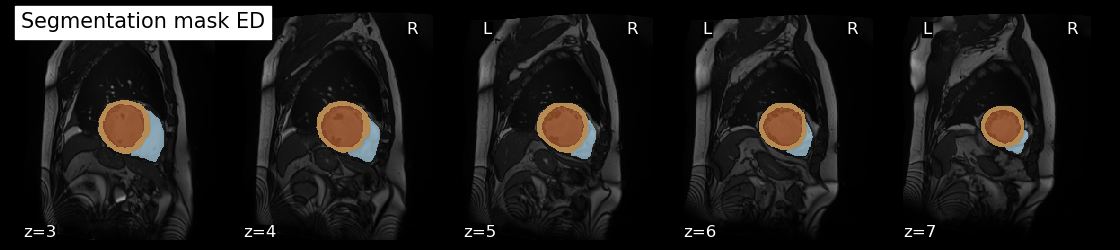

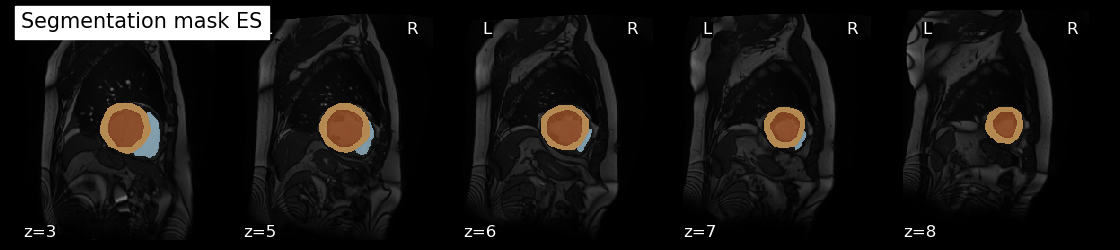

In [4]:
# Load segmentation masks
mri_EDseg = nib.load('./Train/001/001_ED_seg.nii')
mri_ESseg = nib.load('./Train/001/001_ES_seg.nii')

im_EDseg = mri_EDseg.get_fdata()
im_ESseg = mri_ESseg.get_fdata()

# Plot the segmentation mask and the MRI image, but only z-slice 10
plotting.plot_roi(mri_EDseg, bg_img=mri_EDimg, cmap='Paired', display_mode='z', cut_coords=5, title='Segmentation mask ED')
plotting.plot_roi(mri_ESseg, bg_img=mri_ESimg, cmap='Paired', display_mode='z', cut_coords=5, title='Segmentation mask ES')

**Load all ED and ES train images and masks**

In [5]:
train_path = './Train/'

# Charge all the training images of the ED and ES
mri_ED_train, mri_ES_train = lib.load_images(train_path)

# Charge all the training masks of the ED and ES
mask_ED_train, mask_ES_train = lib.load_masks(train_path)


In [6]:
for i in range(len(mri_ED_train)):
    print('Patient {}:'.format(i), mri_ED_train[i].shape, mri_ES_train[i].shape, mask_ED_train[i].shape, mask_ES_train[i].shape)

Patient 0: (216, 256, 10) (216, 256, 10) (216, 256, 10) (216, 256, 10)
Patient 1: (232, 256, 10) (232, 256, 10) (232, 256, 10) (232, 256, 10)
Patient 2: (256, 256, 10) (256, 256, 10) (256, 256, 10) (256, 256, 10)
Patient 3: (232, 256, 10) (232, 256, 10) (232, 256, 10) (232, 256, 10)
Patient 4: (256, 216, 10) (256, 216, 10) (256, 216, 10) (256, 216, 10)
Patient 5: (232, 256, 11) (232, 256, 11) (232, 256, 11) (232, 256, 11)
Patient 6: (222, 224, 10) (222, 224, 10) (222, 224, 10) (222, 224, 10)
Patient 7: (200, 256, 10) (200, 256, 10) (200, 256, 10) (200, 256, 10)
Patient 8: (208, 256, 10) (208, 256, 10) (208, 256, 10) (208, 256, 10)
Patient 9: (208, 256, 10) (208, 256, 10) (208, 256, 10) (208, 256, 10)
Patient 10: (216, 256, 9) (216, 256, 9) (216, 256, 9) (216, 256, 9)
Patient 11: (184, 256, 10) (184, 256, 10) (184, 256, 10) (184, 256, 10)
Patient 12: (216, 256, 10) (216, 256, 10) (216, 256, 10) (216, 256, 10)
Patient 13: (256, 216, 10) (256, 216, 10) (256, 216, 10) (256, 216, 10)
Patien

**OBS:** We can notice that all are different size.

**Load all ED and ES test images and masks**

In [7]:
test_path = './Test/'

# Charge all the testing images of the ED and ES
mri_ED_test, mri_ES_test = lib.load_images(test_path)

# Charge all the testing masks of the ED and ES
mask_ED_test, mask_ES_test = lib.load_masks(test_path)

## Segmentation

Here I check if the segmentation method is correct, first I remove class 3 (LV) from the masks of the training set, then I segment it with the proposed method. In this way I check the effectiveness with the Dice coefficient, using as ground truth the original segmentation.

The masks at each step are also shown (mask without LV segmentation, segmented mask using the proposed method and ground truth).

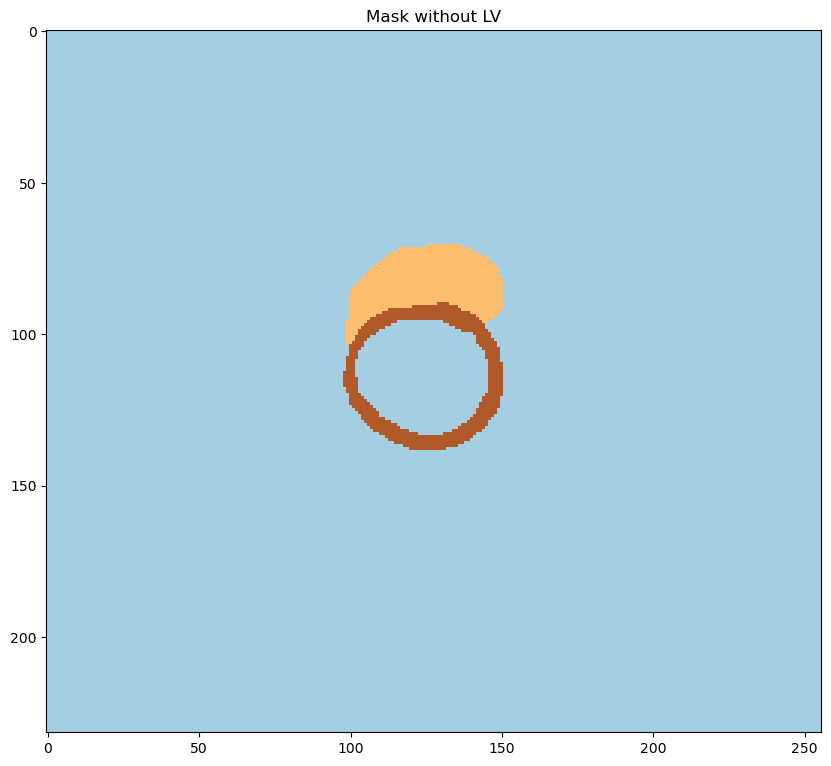

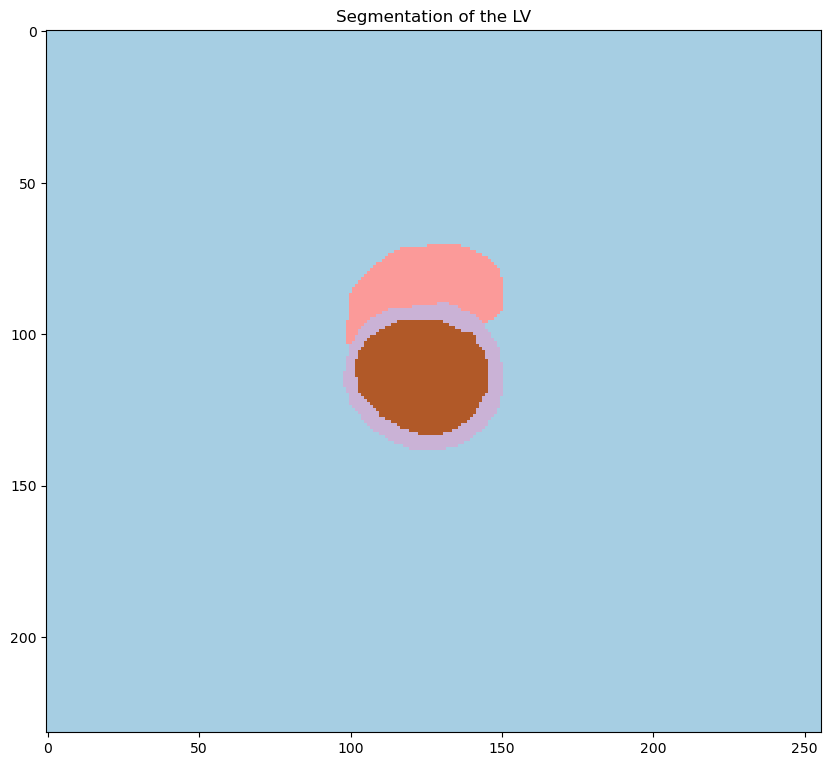

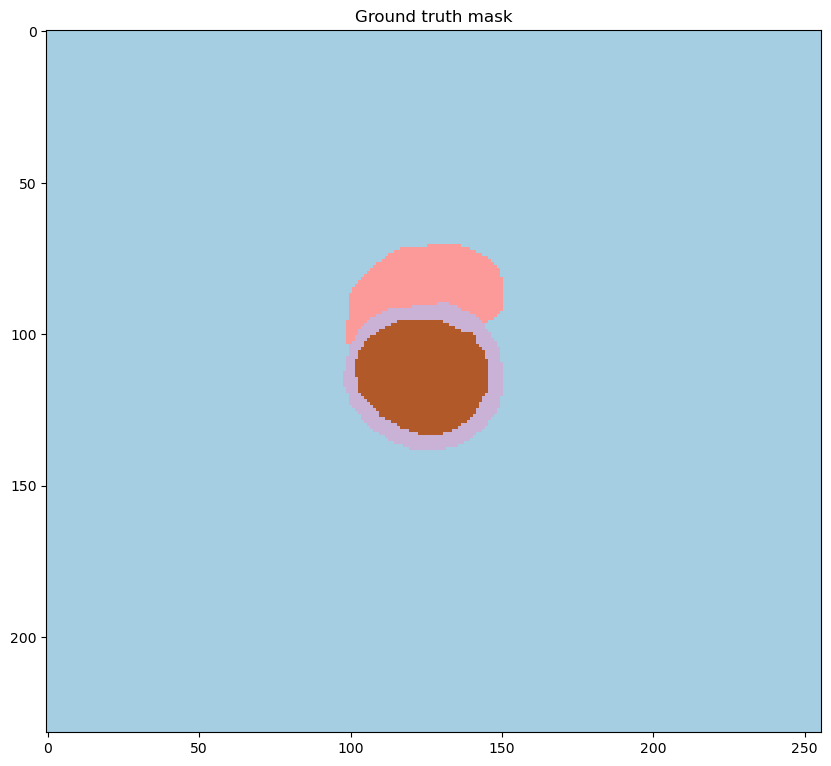

DSC for ED image 0 : 1.0
DSC for ES image 0 : 1.0
DSC for ED image 1 : 1.0
DSC for ES image 1 : 1.0
DSC for ED image 2 : 1.0
DSC for ES image 2 : 1.0
DSC for ED image 3 : 1.0
DSC for ES image 3 : 1.0
DSC for ED image 4 : 1.0
DSC for ES image 4 : 1.0
DSC for ED image 5 : 1.0
DSC for ES image 5 : 1.0
DSC for ED image 6 : 1.0
DSC for ES image 6 : 1.0
DSC for ED image 7 : 1.0
DSC for ES image 7 : 1.0
DSC for ED image 8 : 1.0
DSC for ES image 8 : 1.0
DSC for ED image 9 : 1.0
DSC for ES image 9 : 1.0
DSC for ED image 10 : 1.0
DSC for ES image 10 : 1.0
DSC for ED image 11 : 1.0
DSC for ES image 11 : 1.0
DSC for ED image 12 : 1.0
DSC for ES image 12 : 1.0
DSC for ED image 13 : 1.0
DSC for ES image 13 : 1.0
DSC for ED image 14 : 1.0
DSC for ES image 14 : 1.0
DSC for ED image 15 : 1.0
DSC for ES image 15 : 1.0
DSC for ED image 16 : 1.0
DSC for ES image 16 : 1.0
DSC for ED image 17 : 1.0
DSC for ES image 17 : 1.0
DSC for ED image 18 : 1.0
DSC for ES image 18 : 1.0
DSC for ED image 19 : 1.0
DSC fo

In [8]:
# I'm going to measure my segmentation performance using the Dice Similarity Coefficient (DSC) metric.
# I'm going to segment the traing images using the segmentation_LV function and then I'm going to compare the results with the ground truth masks.



# First I remove the LV from the ground truth masks
new_mask_ED_train = []
new_mask_ES_train = []

# EXTRACT CLASS 3 FROM THE MASKS

for i in range(len(mask_ED_train)):
    mask_ED = mask_ED_train[i].get_fdata()
    mask_ED[np.where(mask_ED == 3)] = 0
    mask_ES = mask_ES_train[i].get_fdata()
    mask_ES[np.where(mask_ES == 3)] = 0
    # Create a new nifti image with the new mask
    new_mask_ED_train.append(nib.Nifti1Image(mask_ED, mask_ED_train[i].affine, mask_ED_train[i].header))
    new_mask_ES_train.append(nib.Nifti1Image(mask_ES, mask_ES_train[i].affine, mask_ES_train[i].header, mask_ES_train[i].extra, mask_ES_train[i].file_map))

# Plot the segmentation mask and the MRI image
mask_0 = new_mask_ED_train[5].get_fdata()

plt.figure(figsize=(10,10))
plt.imshow(mask_0[:,:,6], cmap='Paired')
plt.title('Mask without LV')
plt.show()

# Segment the LV from the myocardium masks
seg_ED_train = lib.segmentation_LV(new_mask_ED_train)
seg_ES_train = lib.segmentation_LV(new_mask_ES_train)

# Plot the segmentation mask and the MRI image
mask_0 = seg_ED_train[5].get_fdata()

plt.figure(figsize=(10,10))
plt.imshow(mask_0[:,:,6], cmap='Paired')
plt.title('Segmentation of the LV')
plt.show()

# Plot the segmentation mask and the MRI image
mask_0 = mask_ED_train[5].get_fdata()

plt.figure(figsize=(10,10))
plt.imshow(mask_0[:,:,6], cmap='Paired')
plt.title('Ground truth mask')
plt.show()

dice = []
# Calculate the DSC for the ED and ES
for i in range(len(seg_ED_train)):
    dsc_ED = lib.dice_similarity(seg_ED_train[i].get_fdata() , new_mask_ED_train[i].get_fdata(), 3)
    dsc_ES = lib.dice_similarity(seg_ES_train[i].get_fdata(), new_mask_ES_train[i].get_fdata(), 3)
    print('DSC for ED image', i, ':', dsc_ED)
    print('DSC for ES image', i, ':', dsc_ES)
    dice.append(dsc_ED)
    dice.append(dsc_ES)

print('Average DSC:',      np.sum(dice)/len(dice))

**OBS:** This result tells us that the segmentation is accurate in each of the masks (DSC = 1 for all masks).

In [9]:
train_path = './Train/'

# Charge all the training images of the ED and ES
mri_ED_train, mri_ES_train = lib.load_images(train_path)

# Charge all the training masks of the ED and ES
mask_ED_train, mask_ES_train = lib.load_masks(train_path)

**Segmentation of LV on the test set**

In [10]:
# Segment the left ventricle (LV) from myocardium (MYO) masks
# print mask header
print(mask_ED_train[0].header)

mask_ED_test = lib.segmentation_LV(mask_ED_test)
mask_ES_test = lib.segmentation_LV(mask_ES_test)




<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 216 256  10   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [ 1.      1.5625  1.5625 10.      1.      1.      1.      1.    ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.0
srow_x          : 

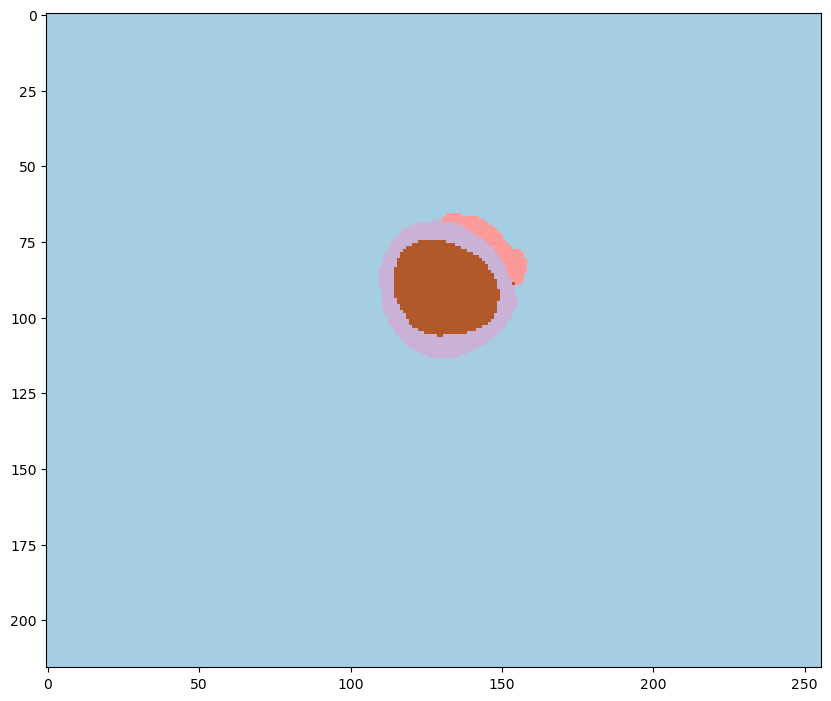

In [11]:
im_0 = mri_ED_test[5].get_fdata()[:,:,6].copy()
mask_0 = mask_ED_test[5].get_fdata()[:,:,6].copy()


plt.figure(figsize=(10,10))
plt.imshow(mask_0, cmap='Paired')
plt.show()



## Features extraction

In [12]:
#create the dataset
# initialize the dataset
dataset_train = []
dataset_test = []

dataset_train = metadata_train
dataset_test = metadata_test

**Thickness extraction** This feature was not used in on the last result.

In [13]:
thickness = False

In [14]:
if thickness:
    # Compute the MYO thickness for the ED and ES

    thickness_ED_train = lib.compute_thickness(mask_ED_train)
    thickness_ES_train = lib.compute_thickness(mask_ES_train)

    thickness_ES_test = lib.compute_thickness(mask_ES_test)
    thickness_ED_test = lib.compute_thickness(mask_ED_test)

    # Add the MYO thickness to the dataset
    dataset_train['MYO_thickness_ED'] = thickness_ED_train
    dataset_train['MYO_thickness_ES'] = thickness_ES_train

    dataset_test['MYO_thickness_ED'] = thickness_ED_test
    dataset_test['MYO_thickness_ES'] = thickness_ED_test


    dataset_train.head()





**Volume, Ejection fraction and Ratio calculation for the training set.**

In [15]:
# Volume calculation

RV_ED, LV_ED, MYO_ED = lib.compute_volumes(mask_ED_train)
RV_ES, LV_ES, MYO_ES = lib.compute_volumes(mask_ES_train)


# Add the features to the dataset
dataset_train['RV_ED'] = RV_ED
dataset_train['RV_ES'] = RV_ES
dataset_train['MYO_ED'] = MYO_ED
dataset_train['MYO_ES'] = MYO_ES
dataset_train['LV_ED'] = LV_ED
dataset_train['LV_ES'] = LV_ES

# Calculate EF and add it to the dataset
EF_RV, EF_LV = lib.compute_EF(dataset_train)

dataset_train['EF_RV'] = EF_RV
dataset_train['EF_LV'] = EF_LV

# Compute RV/LV and MYO/LV ratios and add them to the dataset
dataset_train['RV/LV_ED'] = dataset_train['RV_ED']/dataset_train['LV_ED']
dataset_train['RV/LV_ES'] = dataset_train['RV_ES']/dataset_train['LV_ES']
dataset_train['MYO/LV_ED'] = dataset_train['MYO_ED']/dataset_train['LV_ED']
dataset_train['MYO/LV_ES'] = dataset_train['MYO_ES']/dataset_train['LV_ES']

dataset_train.head()


,Id,Category,Height,Weight,RV_ED,RV_ES,MYO_ED,MYO_ES,LV_ED,LV_ES,EF_RV,EF_LV,RV/LV_ED,RV/LV_ES,MYO/LV_ED,MYO/LV_ES
0,1,2,184.0,95.0,139721.679688,59545.898438,295507.812500,225610.351562,164257.812500,195068.359375,57.382492,-18.757432,0.850624,0.305257,1.799049,1.156571
1,2,2,160.0,70.0,94432.067871,28823.089600,265744.400024,188303.375244,160433.578491,192565.155029,69.477435,-20.027962,0.588605,0.149680,1.656414,0.977868
2,3,2,165.0,77.0,192333.984375,174584.960938,276708.984375,241088.867188,191845.703125,201074.218750,9.228231,-4.810384,1.002545,0.868261,1.442352,1.199004
3,4,2,159.0,46.0,106264.114380,84543.991089,260847.091675,226472.473145,168452.453613,174957.275391,20.439754,-3.861518,0.630826,0.483226,1.548491,1.294444
4,5,2,165.0,77.0,170463.867188,74553.222656,290797.119141,224094.726562,201392.578125,232261.962891,56.264501,-15.327965,0.846426,0.320988,1.443932,0.964836


**Volume, Ejection fraction and Ratio calculation for the tresting set.**

In [16]:
# Volume calculation for the test dataset

RV_ED, LV_ED, MYO_ED = lib.compute_volumes(mask_ED_test)
RV_ES, LV_ES, MYO_ES = lib.compute_volumes(mask_ES_test)

# Add the features to the dataset
dataset_test['RV_ED'] = RV_ED
dataset_test['RV_ES'] = RV_ES
dataset_test['MYO_ED'] = MYO_ED
dataset_test['MYO_ES'] = MYO_ES
dataset_test['LV_ED'] = LV_ED
dataset_test['LV_ES'] = LV_ES

# Calculate EF and add it to the dataset
EF_RV, EF_LV = lib.compute_EF(dataset_test)

dataset_test['EF_RV'] = EF_RV
dataset_test['EF_LV'] = EF_LV

# Compute RV/LV and MYO/LV ratios and add them to the dataset
dataset_test['RV/LV_ED'] = dataset_test['RV_ED']/dataset_test['LV_ED']
dataset_test['RV/LV_ES'] = dataset_test['RV_ES']/dataset_test['LV_ES']
dataset_test['MYO/LV_ED'] = dataset_test['MYO_ED']/dataset_test['LV_ED']
dataset_test['MYO/LV_ES'] = dataset_test['MYO_ES']/dataset_test['LV_ES']

dataset_test.head()



,Id,Height,Weight,RV_ED,RV_ES,MYO_ED,MYO_ES,LV_ED,LV_ES,EF_RV,EF_LV,RV/LV_ED,RV/LV_ES,MYO/LV_ED,MYO/LV_ES
0,101,167.0,89.0,143329.509830,84921.052303,278126.539921,194335.973892,153584.635323,149924.013100,40.751174,2.383456,0.933228,0.566427,1.810901,1.296230
1,102,137.0,35.0,169334.609728,98704.196892,73929.047070,33127.914619,42457.528181,43250.332975,41.710559,-1.867289,3.988329,2.282160,1.741247,0.765957
2,103,167.0,116.0,172412.109375,94458.007812,125561.523438,41748.046875,113867.187500,128100.585938,45.213820,-12.500000,1.514151,0.737374,1.102702,0.325901
3,104,160.0,98.0,147985.239052,55197.727791,108058.944923,19925.762894,119629.345703,143349.601906,62.700518,-19.828125,1.237031,0.385057,0.903281,0.139001
4,105,174.0,64.0,222480.845404,167480.012798,121822.950983,50810.292978,95915.222883,108033.810453,24.721604,-12.634686,2.319557,1.550256,1.270111,0.470318


**This is and old function i used to calculate the features, but I didn't consider the voxel size for the volume calculation.**

In [17]:
'''	FEATURES EXTRACTION	
# Extract features from the masks
RV_ED1, MYO_ED1, LV_ED1 = lib.features_extraction(mask_ED_train)
RV_ES1, MYO_ES1, LV_ES1 = lib.features_extraction(mask_ES_train)


# Add the features to the dataset
dataset_train['RV_ED'] = RV_ED
dataset_train['RV_ES'] = RV_ES
dataset_train['MYO_ED'] = MYO_ED
dataset_train['MYO_ES'] = MYO_ES
dataset_train['LV_ED'] = LV_ED
dataset_train['LV_ES'] = LV_ES

importlib.reload(lib)
# Calculate EF and add it to the dataset
EF_RV, EF_LV = lib.compute_EF(dataset_train)

dataset_train['EF_RV'] = EF_RV
dataset_train['EF_LV'] = EF_LV


dataset_train.head()


# Compute RV/LV and MYO/LV ratios and add them to the dataset
dataset_train['RV/LV_ED'] = dataset_train['RV_ED']/dataset_train['LV_ED']
dataset_train['RV/LV_ES'] = dataset_train['RV_ES']/dataset_train['LV_ES']
dataset_train['MYO/LV_ED'] = dataset_train['MYO_ED']/dataset_train['LV_ED']
dataset_train['MYO/LV_ES'] = dataset_train['MYO_ES']/dataset_train['LV_ES']

# Print the first 5 rows of the dataset
dataset_train.head()
'''


"\tFEATURES EXTRACTION\t\n# Extract features from the masks\nRV_ED1, MYO_ED1, LV_ED1 = lib.features_extraction(mask_ED_train)\nRV_ES1, MYO_ES1, LV_ES1 = lib.features_extraction(mask_ES_train)\n\n\n# Add the features to the dataset\ndataset_train['RV_ED'] = RV_ED\ndataset_train['RV_ES'] = RV_ES\ndataset_train['MYO_ED'] = MYO_ED\ndataset_train['MYO_ES'] = MYO_ES\ndataset_train['LV_ED'] = LV_ED\ndataset_train['LV_ES'] = LV_ES\n\nimportlib.reload(lib)\n# Calculate EF and add it to the dataset\nEF_RV, EF_LV = lib.compute_EF(dataset_train)\n\ndataset_train['EF_RV'] = EF_RV\ndataset_train['EF_LV'] = EF_LV\n\n\ndataset_train.head()\n\n\n# Compute RV/LV and MYO/LV ratios and add them to the dataset\ndataset_train['RV/LV_ED'] = dataset_train['RV_ED']/dataset_train['LV_ED']\ndataset_train['RV/LV_ES'] = dataset_train['RV_ES']/dataset_train['LV_ES']\ndataset_train['MYO/LV_ED'] = dataset_train['MYO_ED']/dataset_train['LV_ED']\ndataset_train['MYO/LV_ES'] = dataset_train['MYO_ES']/dataset_train['LV_ES

In [18]:
'''	FEATURES EXTRACTION	
# Extract features from the masks
# Extract features from the masks
RV_ED, MYO_ED, LV_ED = lib.features_extraction(mask_ED_test)
RV_ES, MYO_ES, LV_ES = lib.features_extraction(mask_ES_test)

# Add the features to the dataset
dataset_test['RV_ED'] = RV_ED
dataset_test['RV_ES'] = RV_ES
dataset_test['MYO_ED'] = MYO_ED
dataset_test['MYO_ES'] = MYO_ES
dataset_test['LV_ED'] = LV_ED
dataset_test['LV_ES'] = LV_ES

# Calculate EF and add it to the dataset
EF_RV, EF_LV = lib.compute_EF(dataset_test)

dataset_test['EF_RV'] = EF_RV
dataset_test['EF_LV'] = EF_LV

# Compute RV/LV and MYO/LV ratios and add them to the dataset
dataset_test['RV/LV_ED'] = dataset_test['RV_ED']/dataset_test['LV_ED']
dataset_test['RV/LV_ES'] = dataset_test['RV_ES']/dataset_test['LV_ES']
dataset_test['MYO/LV_ED'] = dataset_test['MYO_ED']/dataset_test['LV_ED']
dataset_test['MYO/LV_ES'] = dataset_test['MYO_ES']/dataset_test['LV_ES']




# Print the first 5 rows of the dataset
dataset_test.head()
'''

"\tFEATURES EXTRACTION\t\n# Extract features from the masks\n# Extract features from the masks\nRV_ED, MYO_ED, LV_ED = lib.features_extraction(mask_ED_test)\nRV_ES, MYO_ES, LV_ES = lib.features_extraction(mask_ES_test)\n\n# Add the features to the dataset\ndataset_test['RV_ED'] = RV_ED\ndataset_test['RV_ES'] = RV_ES\ndataset_test['MYO_ED'] = MYO_ED\ndataset_test['MYO_ES'] = MYO_ES\ndataset_test['LV_ED'] = LV_ED\ndataset_test['LV_ES'] = LV_ES\n\n# Calculate EF and add it to the dataset\nEF_RV, EF_LV = lib.compute_EF(dataset_test)\n\ndataset_test['EF_RV'] = EF_RV\ndataset_test['EF_LV'] = EF_LV\n\n# Compute RV/LV and MYO/LV ratios and add them to the dataset\ndataset_test['RV/LV_ED'] = dataset_test['RV_ED']/dataset_test['LV_ED']\ndataset_test['RV/LV_ES'] = dataset_test['RV_ES']/dataset_test['LV_ES']\ndataset_test['MYO/LV_ED'] = dataset_test['MYO_ED']/dataset_test['LV_ED']\ndataset_test['MYO/LV_ES'] = dataset_test['MYO_ES']/dataset_test['LV_ES']\n\n\n\n\n# Print the first 5 rows of the dat

**Mass center displacement of each segmentation mask (LV, RV and MYO) between systole and diastole.**

In [19]:
# reload the library
importlib.reload(lib)

# The class are encoded as follows:
# 1: RV
# 2: MYO
# 3: LV

# Mass center of each class in the training dataset
mass_center_LV_ED = lib.mass_center(mask_ED_train,3)
mass_center_RV_ED = lib.mass_center(mask_ED_train, 1)
mass_center_MYO_ED = lib.mass_center(mask_ED_train, 2)

mass_center_LV_ES = lib.mass_center(mask_ES_train, 3)
mass_center_RV_ES = lib.mass_center(mask_ES_train, 1)
mass_center_MYO_ES = lib.mass_center(mask_ES_train, 2)


# ED_ES displacement
displacement_LV = mass_center_LV_ES - mass_center_LV_ED
displacement_RV = mass_center_RV_ES - mass_center_RV_ED
displacement_MYO = mass_center_MYO_ES - mass_center_MYO_ED

# Add the displacement to the dataset
dataset_train['deltax_LV'] = displacement_LV[:,0]
dataset_train['deltay_LV'] = displacement_LV[:,1]
dataset_train['deltaz_LV'] = displacement_LV[:,2]

dataset_train['deltax_RV'] = displacement_RV[:,0]
dataset_train['deltay_RV'] = displacement_RV[:,1]
dataset_train['deltaz_RV'] = displacement_RV[:,2]

dataset_train['deltax_MYO'] = displacement_MYO[:,0]
dataset_train['deltay_MYO'] = displacement_MYO[:,1]
dataset_train['deltaz_MYO'] = displacement_MYO[:,2]




# Print the first 5 rows of the dataset
dataset_train.head()






    
    

,Id,Category,Height,Weight,RV_ED,RV_ES,MYO_ED,MYO_ES,LV_ED,LV_ES,...,MYO/LV_ES,deltax_LV,deltay_LV,deltaz_LV,deltax_RV,deltay_RV,deltaz_RV,deltax_MYO,deltay_MYO,deltaz_MYO
0,1,2,184.0,95.0,139721.679688,59545.898438,295507.812500,225610.351562,164257.812500,195068.359375,...,1.156571,-2.335208,1.811695,0.010676,1.275576,-0.783472,0.280273,-0.862977,1.377368,0.349549
1,2,2,160.0,70.0,94432.067871,28823.089600,265744.400024,188303.375244,160433.578491,192565.155029,...,0.977868,-1.598911,1.650472,0.143883,2.375318,-2.914811,0.347194,0.773916,-0.748292,0.105268
2,3,2,165.0,77.0,192333.984375,174584.960938,276708.984375,241088.867188,191845.703125,201074.218750,...,1.199004,-0.088159,-0.676850,0.045592,2.648428,0.003840,0.134127,0.567056,0.370836,0.062136
3,4,2,159.0,46.0,106264.114380,84543.991089,260847.091675,226472.473145,168452.453613,174957.275391,...,1.294444,-1.145440,1.252195,0.053626,0.489262,-3.651263,0.022517,0.192708,0.373813,0.126392
4,5,2,165.0,77.0,170463.867188,74553.222656,290797.119141,224094.726562,201392.578125,232261.962891,...,0.964836,-2.159917,-4.195679,0.273377,-1.920662,-1.063479,-0.017905,0.025404,-2.251053,0.172413


**Only mass center** These features were eliminated from the final model because didn't add significant information.

In [20]:
ms = False

In [21]:
if ms:
    # Add the mass center to the dataset
    dataset_train['MCx_LV_ED'] = mass_center_LV_ED[:,0]
    dataset_train['MCy_LV_ED'] = mass_center_LV_ED[:,1]
    dataset_train['MCz_LV_ED'] = mass_center_LV_ED[:,2]

    dataset_train['MCx_RV_ED'] = mass_center_RV_ED[:,0]
    dataset_train['MCy_RV_ED'] = mass_center_RV_ED[:,1]
    dataset_train['MCz_RV_ED'] = mass_center_RV_ED[:,2]

    dataset_train['MCx_MYO_ED'] = mass_center_MYO_ED[:,0]
    dataset_train['MCy_MYO_ED'] = mass_center_MYO_ED[:,1]
    dataset_train['MCz_MYO_ED'] = mass_center_MYO_ED[:,2]

    dataset_train['MCx_LV_ES'] = mass_center_LV_ES[:,0]
    dataset_train['MCy_LV_ES'] = mass_center_LV_ES[:,1]
    dataset_train['MCz_LV_ES'] = mass_center_LV_ES[:,2]

    dataset_train['MCx_RV_ES'] = mass_center_RV_ES[:,0]
    dataset_train['MCy_RV_ES'] = mass_center_RV_ES[:,1]
    dataset_train['MCz_RV_ES'] = mass_center_RV_ES[:,2]

    dataset_train['MCx_MYO_ES'] = mass_center_MYO_ES[:,0]
    dataset_train['MCy_MYO_ES'] = mass_center_MYO_ES[:,1]
    dataset_train['MCz_MYO_ES'] = mass_center_MYO_ES[:,2]



In [22]:
# Do the same for the test dataset

# mass center of each class in the test dataset
mass_center_LV_ED = lib.mass_center(mask_ED_test,3)
mass_center_RV_ED = lib.mass_center(mask_ED_test, 1)
mass_center_MYO_ED = lib.mass_center(mask_ED_test, 2)

mass_center_LV_ES = lib.mass_center(mask_ES_test, 3)
mass_center_RV_ES = lib.mass_center(mask_ES_test, 1)
mass_center_MYO_ES = lib.mass_center(mask_ES_test, 2)

# ED_ES displacement
displacement_LV = mass_center_LV_ES - mass_center_LV_ED
displacement_RV = mass_center_RV_ES - mass_center_RV_ED
displacement_MYO = mass_center_MYO_ES - mass_center_MYO_ED

# Add the displacement to the dataset
dataset_test['deltax_LV'] = displacement_LV[:,0]
dataset_test['deltay_LV'] = displacement_LV[:,1]
dataset_test['deltaz_LV'] = displacement_LV[:,2]

dataset_test['deltax_RV'] = displacement_RV[:,0]
dataset_test['deltay_RV'] = displacement_RV[:,1]
dataset_test['deltaz_RV'] = displacement_RV[:,2]

dataset_test['deltax_MYO'] = displacement_MYO[:,0]
dataset_test['deltay_MYO'] = displacement_MYO[:,1]
dataset_test['deltaz_MYO'] = displacement_MYO[:,2]


# Print the first 5 rows of the dataset
dataset_test.head()



,Id,Height,Weight,RV_ED,RV_ES,MYO_ED,MYO_ES,LV_ED,LV_ES,EF_RV,...,MYO/LV_ES,deltax_LV,deltay_LV,deltaz_LV,deltax_RV,deltay_RV,deltaz_RV,deltax_MYO,deltay_MYO,deltaz_MYO
0,101,167.0,89.0,143329.509830,84921.052303,278126.539921,194335.973892,153584.635323,149924.013100,40.751174,...,1.296230,-1.466798,-1.885255,0.293665,2.395520,0.899416,0.649222,-0.278093,1.187897,0.642305
1,102,137.0,35.0,169334.609728,98704.196892,73929.047070,33127.914619,42457.528181,43250.332975,41.710559,...,0.765957,-3.371998,2.683895,-0.250647,-1.534947,-0.021062,-0.401453,-3.388874,2.882588,0.589953
2,103,167.0,116.0,172412.109375,94458.007812,125561.523438,41748.046875,113867.187500,128100.585938,45.213820,...,0.325901,-1.007856,0.945259,-0.019241,1.602129,-0.835822,0.525559,-0.742591,0.534067,0.543287
3,104,160.0,98.0,147985.239052,55197.727791,108058.944923,19925.762894,119629.345703,143349.601906,62.700518,...,0.139001,0.002774,4.359986,-0.548128,3.395966,-1.882187,0.882245,-1.206741,2.069264,0.804418
4,105,174.0,64.0,222480.845404,167480.012798,121822.950983,50810.292978,95915.222883,108033.810453,24.721604,...,0.470318,-0.699338,-2.324702,-0.598932,1.567881,-1.147626,-0.564227,-0.422486,-2.149214,0.700953


In [23]:
if ms:

    # Add the mass center to the dataset
    dataset_test['MCx_LV_ED'] = mass_center_LV_ED[:,0]
    dataset_test['MCy_LV_ED'] = mass_center_LV_ED[:,1]
    dataset_test['MCz_LV_ED'] = mass_center_LV_ED[:,2]

    dataset_test['MCx_RV_ED'] = mass_center_RV_ED[:,0]
    dataset_test['MCy_RV_ED'] = mass_center_RV_ED[:,1]
    dataset_test['MCz_RV_ED'] = mass_center_RV_ED[:,2]

    dataset_test['MCx_MYO_ED'] = mass_center_MYO_ED[:,0]
    dataset_test['MCy_MYO_ED'] = mass_center_MYO_ED[:,1]
    dataset_test['MCz_MYO_ED'] = mass_center_MYO_ED[:,2]

    dataset_test['MCx_LV_ES'] = mass_center_LV_ES[:,0]
    dataset_test['MCy_LV_ES'] = mass_center_LV_ES[:,1]
    dataset_test['MCz_LV_ES'] = mass_center_LV_ES[:,2]

    dataset_test['MCx_RV_ES'] = mass_center_RV_ES[:,0]
    dataset_test['MCy_RV_ES'] = mass_center_RV_ES[:,1]
    dataset_test['MCz_RV_ES'] = mass_center_RV_ES[:,2]

    dataset_test['MCx_MYO_ES'] = mass_center_MYO_ES[:,0]
    dataset_test['MCy_MYO_ES'] = mass_center_MYO_ES[:,1]
    dataset_test['MCz_MYO_ES'] = mass_center_MYO_ES[:,2]


In [24]:
dataset_train.head()

,Id,Category,Height,Weight,RV_ED,RV_ES,MYO_ED,MYO_ES,LV_ED,LV_ES,...,MYO/LV_ES,deltax_LV,deltay_LV,deltaz_LV,deltax_RV,deltay_RV,deltaz_RV,deltax_MYO,deltay_MYO,deltaz_MYO
0,1,2,184.0,95.0,139721.679688,59545.898438,295507.812500,225610.351562,164257.812500,195068.359375,...,1.156571,-2.335208,1.811695,0.010676,1.275576,-0.783472,0.280273,-0.862977,1.377368,0.349549
1,2,2,160.0,70.0,94432.067871,28823.089600,265744.400024,188303.375244,160433.578491,192565.155029,...,0.977868,-1.598911,1.650472,0.143883,2.375318,-2.914811,0.347194,0.773916,-0.748292,0.105268
2,3,2,165.0,77.0,192333.984375,174584.960938,276708.984375,241088.867188,191845.703125,201074.218750,...,1.199004,-0.088159,-0.676850,0.045592,2.648428,0.003840,0.134127,0.567056,0.370836,0.062136
3,4,2,159.0,46.0,106264.114380,84543.991089,260847.091675,226472.473145,168452.453613,174957.275391,...,1.294444,-1.145440,1.252195,0.053626,0.489262,-3.651263,0.022517,0.192708,0.373813,0.126392
4,5,2,165.0,77.0,170463.867188,74553.222656,290797.119141,224094.726562,201392.578125,232261.962891,...,0.964836,-2.159917,-4.195679,0.273377,-1.920662,-1.063479,-0.017905,0.025404,-2.251053,0.172413


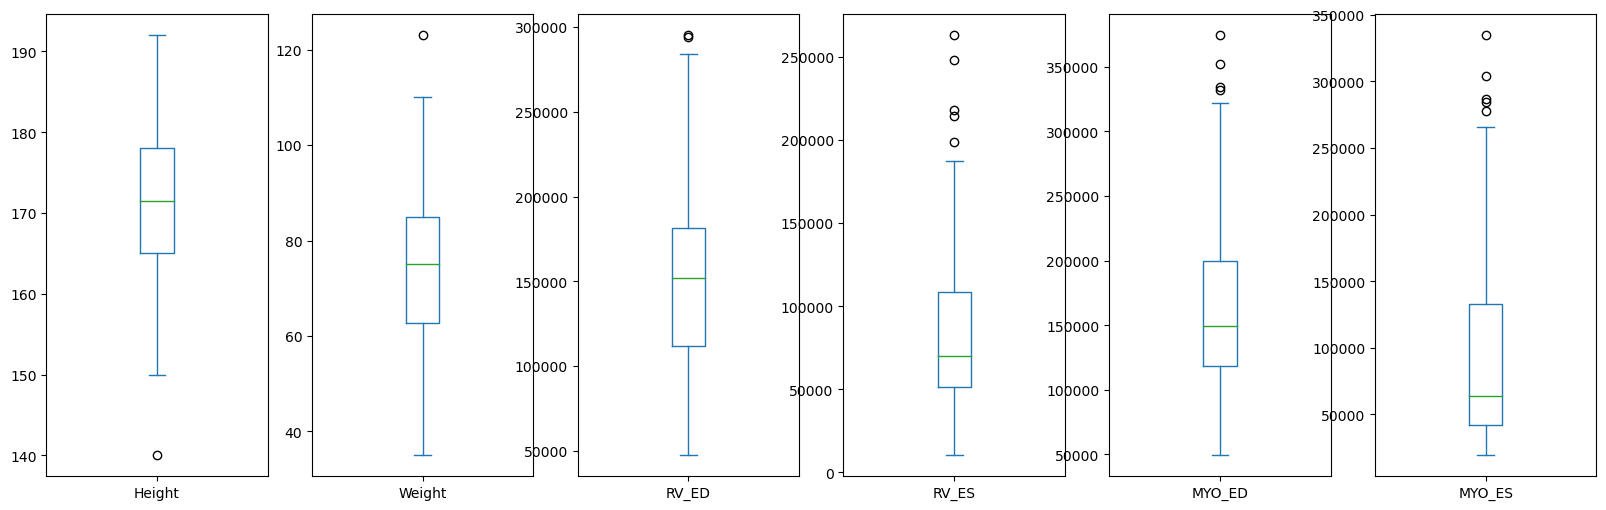

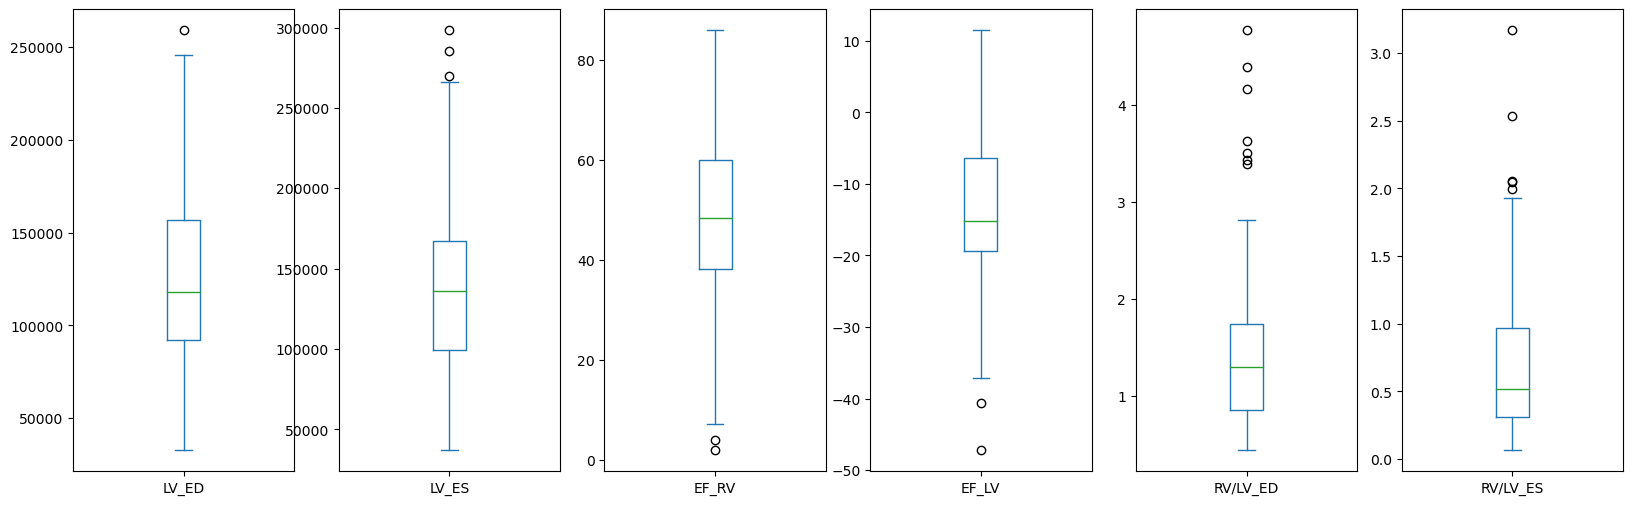

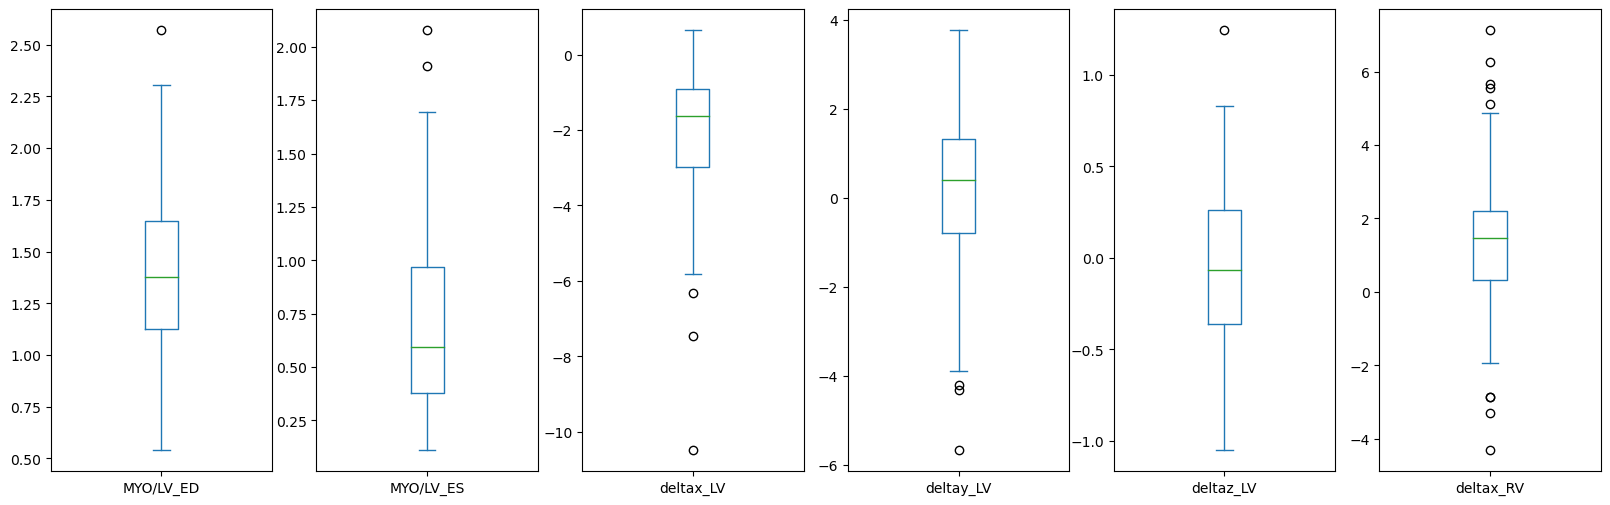

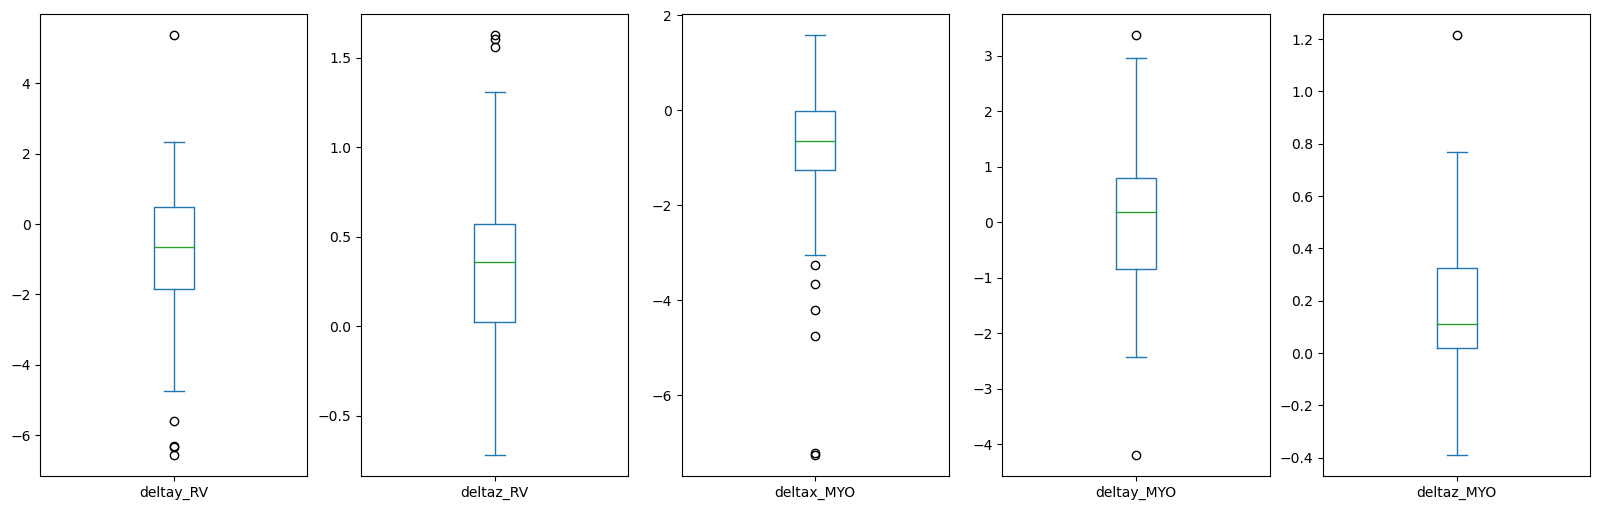

In [25]:
# boxplot of each of the features of the training dataset into subplots

# boxplot of each of the features of the training dataset into subplots
df1 = dataset_train[['Height', 'Weight', 'RV_ED', 'RV_ES', 'MYO_ED', 'MYO_ES']]
df2 = dataset_train[['LV_ED', 'LV_ES', 'EF_RV', 'EF_LV', 'RV/LV_ED', 'RV/LV_ES']]
df3 = dataset_train[['MYO/LV_ED', 'MYO/LV_ES', 'deltax_LV', 'deltay_LV', 'deltaz_LV', 'deltax_RV']]
df4 = dataset_train[[ 'deltay_RV', 'deltaz_RV', 'deltax_MYO', 'deltay_MYO', 'deltaz_MYO']]

df1.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(20,6))
plt.show()
df2.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(20, 6))
plt.show()
df3.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(20, 6))
plt.show()
df4.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(20, 6))
plt.show()


## Train a RF classifier




In [26]:
# conditioning the dataset

y_train = dataset_train[['Category']]
ds_train = dataset_train.drop(['Category'], axis=1)
ds_train = ds_train.drop(['Id'], axis=1)
X_train = ds_train

X_test = dataset_test.drop(['Id'], axis=1)

# Drop headers from the dataset
X_train = X_train.values
y_train = y_train.values.ravel()
X_test = X_test.values




In [27]:
# standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)





In [31]:
# Cross-validation to find the best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create the parameter grid based on the results of random search
param_grid = {'n_estimators': [70, 80, 100, 120, 150], 'max_depth': [3, 5, 6, 7, 8, 9, 10]}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

# Accuracy of the RF classifier
print(grid_search.best_score_)





Fitting 5 folds for each of 35 candidates, totalling 175 fits
{'max_depth': 5, 'n_estimators': 150}
0.9299999999999999


In [29]:
# Fit a random forest classifier with the best parameters to the training data
clf = RandomForestClassifier(n_estimators= grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'], random_state=42)
clf.fit(X_train, y_train)

# Predict the labels of the test dataset
y_pred = clf.predict(X_test)

# Create a dataframe with the patient IDs and the predicted labels
df = pd.DataFrame({'Id': dataset_test['Id'], 'Category': y_pred})

# Save the dataframe to a csv file that can be submitted to the challenge
df.to_csv('./Submission.csv', index=False)




**Feature importance to see wich features keep**

[0.01056102 0.01237645 0.02580489 0.05031408 0.06414636 0.12175865
 0.05609993 0.05125004 0.05583616 0.0121398  0.10669077 0.0919852
 0.07314043 0.14650955 0.01357455 0.01438259 0.0343398  0.01422996
 0.00641371 0.00869942 0.01280379 0.00552441 0.01141845]
[13  5 10 11 12  4  6  8  7  3 16  2 15 17 14 20  1  9 22  0 19 18 21]


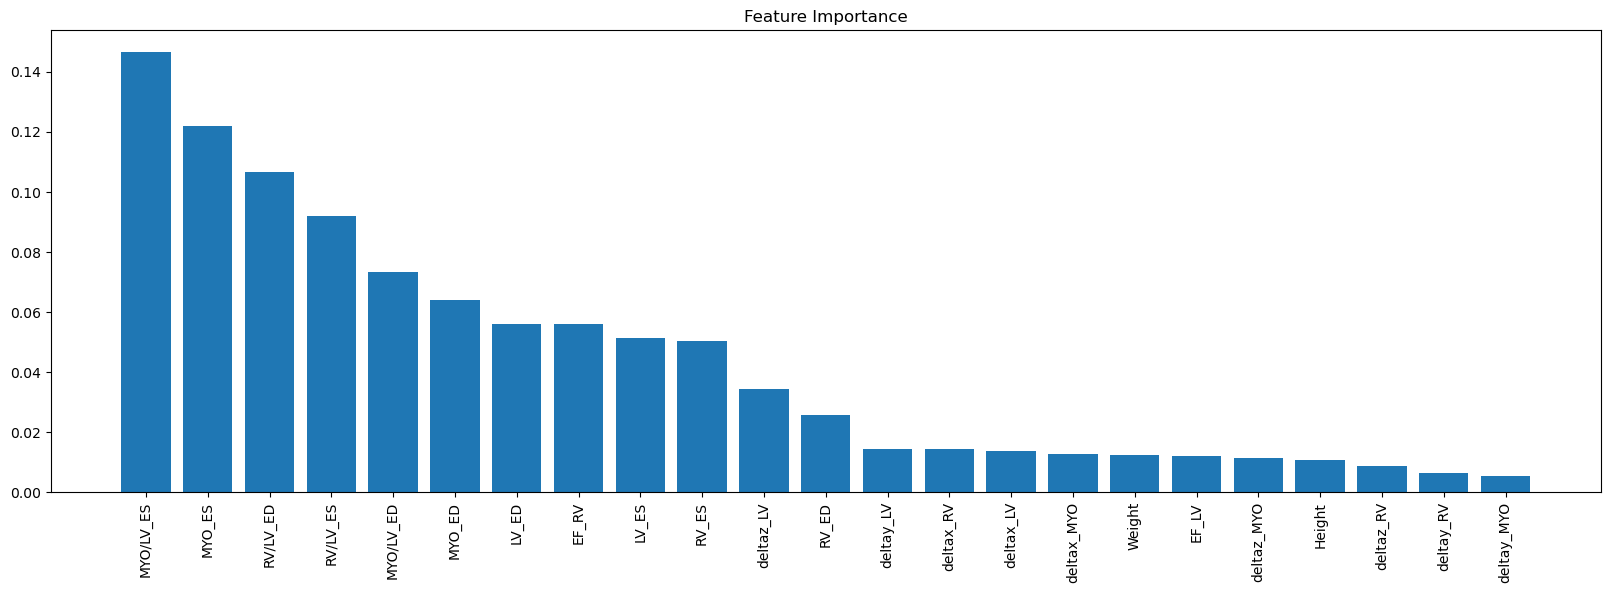

In [30]:
features = dataset_train.columns[1:]
features = features.drop(['Category'])
importances = clf.feature_importances_
print(importances)
indices = np.argsort(importances)[::-1]
print(indices)
plt.figure(figsize=(20, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.show()
